# 从逻辑回归到神经网络

#### 机器学习
+ P：计算机程序在某任务类T上的性能。
+ T：计算机程序希望实现的任务类。
+ E：表示经验，即历史的数据集。
若该计算机程序通过利用经验E在任务T上获得了性能P的改善，则称该程序对E进行了学习。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns



In [3]:
data = pd.read_csv("../data/example_data.csv")
data

,AARS,AASS,AATK,ABCA10,ABCA2,ABCA6,ABCA8,ABCC1,ABCC6,ABCD1,...,ADAT1,ADCY8,ADH4,ADIPOR1,ADK,ADMR,ADORA3,ADPN,ADPRHL2,Label
0,0.982873,-1.343148,-1.360470,0.314431,-1.056782,-0.462569,-0.785541,1.177477,-0.187141,0.157146,...,0.434958,-0.394810,-0.692391,0.632923,-0.390347,-0.258687,-0.884558,1.125093,0.108534,0
1,0.733363,0.761443,-0.015872,0.389267,0.536781,0.784279,1.173898,1.170470,-0.436989,-0.680011,...,0.240657,-1.172953,-0.628977,1.437703,-0.366973,-1.303174,0.860888,-0.164309,-0.278784,0
2,-0.822491,0.059338,0.543720,0.120908,-0.131263,0.075288,0.224264,0.100828,0.257191,-0.412122,...,0.664718,0.322900,0.833359,-0.084532,0.613312,0.580319,-1.295527,0.822411,0.154268,0
3,0.072388,0.911399,-0.761132,-0.347323,-0.523297,-0.054599,0.759441,-0.710527,-1.056863,-0.448342,...,0.560867,-0.706701,-1.508578,1.161934,-0.280072,-1.157154,0.169049,0.574073,-0.873460,0
4,1.711796,-0.588005,-0.482887,-1.715154,-0.753493,-0.059568,-0.125177,0.875032,-0.223659,-0.010653,...,0.570496,-0.935180,-0.722772,1.110818,-1.101344,-0.351947,-0.611787,1.001165,0.530584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,-0.058199,-0.117686,-0.173281,-0.044497,-0.262732,-0.394037,-0.757079,0.499804,0.815422,-0.234542,...,0.434566,0.485687,0.676325,-0.230113,0.941544,0.380727,-2.162667,0.162506,0.441242,0
810,-0.124865,-0.534520,-0.186251,0.142901,-0.922338,-0.520443,-1.551415,0.710682,-0.037258,-0.237759,...,0.913219,0.320515,1.515506,0.189239,1.025047,0.564537,-1.512296,1.109011,-1.008735,0
811,1.360267,-0.187431,-0.017207,-1.087708,-0.464458,-1.103272,0.483850,0.417837,-0.928145,-0.451299,...,1.534404,-0.426118,-1.651866,0.930210,-0.683002,-1.195665,-0.365118,-0.128105,-0.216180,0
812,0.484136,-0.469130,-1.472990,-0.746055,-1.318162,-0.852344,-0.624996,0.868138,-1.218565,-0.945759,...,0.227269,-0.566578,-0.126818,0.914177,-1.187428,-1.490564,-1.497733,0.336060,-0.097096,0


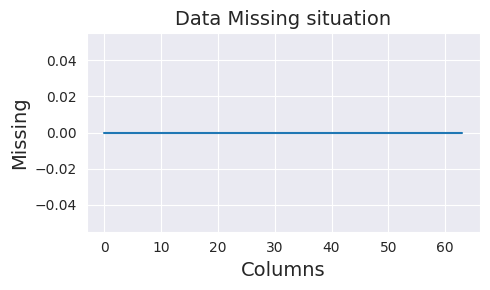

In [4]:
missing_values_count = data.isnull().sum()
plt.figure(figsize=(5,3))
plt.plot(list(missing_values_count))
plt.xlabel("Columns",fontsize=14)
plt.ylabel("Missing",fontsize=14)
plt.title("Data Missing situation",fontsize=14)
plt.tight_layout()
plt.show()

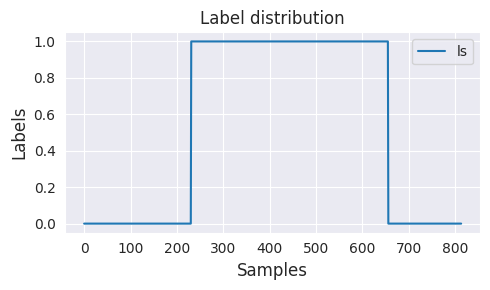

In [5]:
label = list(data.Label)
plt.figure(figsize=(5,3))
plt.plot(label,label="ls")
plt.xlabel("Samples",fontsize=12)
plt.ylabel("Labels",fontsize=12)
plt.title("Label distribution",fontsize=12)
plt.legend()
plt.tight_layout()
# plt.savefig('./my_figure.png', dpi=300)  # 在保存时设置DPI为300

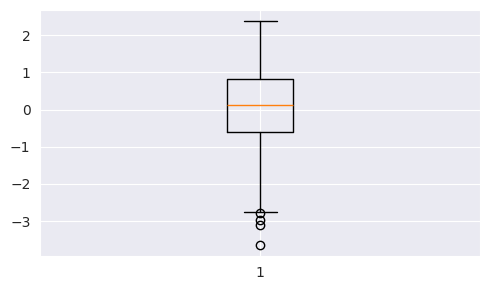

0


In [6]:
# data.drop(columns='Label').shape
scaler=StandardScaler()
x = data.iloc[:,:-1]
x_std=scaler.fit_transform(x)
df_std = pd.concat([pd.DataFrame(x_std, columns=data.columns[:-1]), data.iloc[:, -1]], axis=1)
# df_std
v1=df_std['AARS']
list(v1)
df_std.to_csv("std.csv")

plt.figure(figsize=(5,3))
plt.boxplot(list(v1))
plt.tight_layout()
plt.show()
print(int(sum(list(v1))/len(list(v1))))

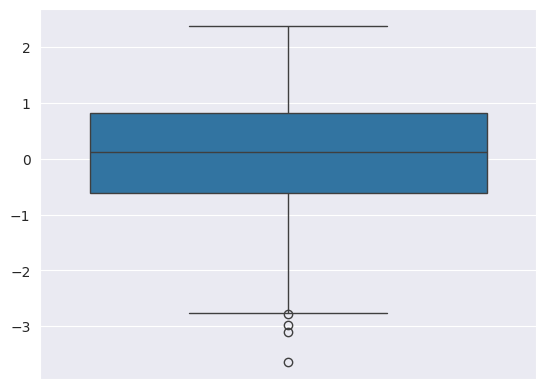

In [7]:
sns.boxplot(data=list(v1))
plt.show()

#### 数据集
+ 所有训练样本的集合为：训练集（trainning set），[特殊]。
+ 所有测试样本的集合为：测试集（test set），[一般]。
+ 机器学习出来的模型适用于新样本的能力为：泛化能力（generalization），即从特殊到一般。
+ 预测值为离散值的问题为：分类（classification）。
+ 预测值为连续值的问题为：回归（regression）。
+ 训练数据有标记信息的学习任务为：监督学习（supervised learning），容易知道上面所描述的分类和回归都是监督学习的范畴。
+ 训练数据没有标记信息的学习任务为：无监督学习（unsupervised learning），常见的有聚类和关联规则。


|           | 预测值：0       | 预测值：1       |
| ---- | ---- | ---- |
| 真实值：0 | TN（正确预测0） | FP（错误预测0） |
| 真实值：1 | FN（错误预测1） | TP（正确预测1） |


+ precision = TP / (TP + FP)[所有预测为1中预测正确的]
+ recall = TP / (TP + FN)[所有原本为1中预测正确的]

/home/lz/venvs/ML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/lz/venvs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lz/venvs/ML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/lz/venvs/ML/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/lz/venvs/ML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the 

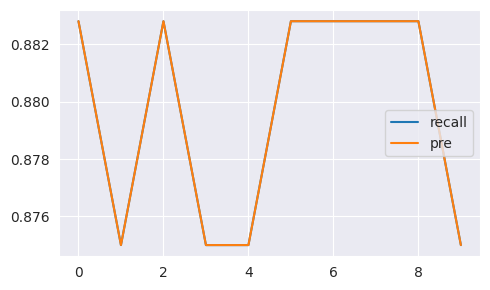

F1 0.8796875
pre 0.8796875
avg_pre 0.9614869335220373


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,matthews_corrcoef,mean_absolute_error,mean_squared_error
from sklearn.metrics import precision_score,recall_score,average_precision_score,precision_recall_curve
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

f1 = []
mcc = []
precision_scores = []
average_precision_scores=0
recall_scores = []
mean_absolute_errors = []
mean_squared_errors = []

X = df_std.iloc[:,:-1]
y = data.Label
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,
                                                 stratify=y,  # 按照标签来分层采样
                                                 shuffle=True, # 是否先打乱数据的顺序再划分
                                                 random_state=1)   # 控制将样本随机打乱
# clf=RandomForestClassifier(n_jobs=-1,n_estimators=100)
random_state = np.random.RandomState(0)
clf = svm.LinearSVC(random_state=random_state)

kf = KFold(n_splits=10, shuffle=False)
for train_index, valid_index in kf.split(X, y):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = clf.decision_function(X_test)
    precision_scores.append((precision_score(y_true=y_test,y_pred=y_pred)))
    recall_scores.append(recall_score(y_true=y_test,y_pred=y_pred))
    average_precision_scores=average_precision_score(y_true=y_test,y_score=y_score)
    f1.append(f1_score(y_true=y_test,y_pred=y_pred))
    mcc.append(matthews_corrcoef(y_true=y_test,y_pred=y_pred))
    mean_absolute_errors.append(mean_absolute_error(y_true=y_test,y_pred=y_pred))
    mean_squared_errors.append(mean_squared_error(y_true=y_test,y_pred=y_pred))
    

plt.figure(figsize=(5,3))

plt.plot(recall_scores,label='recall')
plt.plot(precision_scores,label='pre')
plt.tight_layout()
plt.legend()
plt.show()

print('F1', np.mean(recall_scores))
print('pre', np.mean(precision_scores))
print('avg_pre',average_precision_scores)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


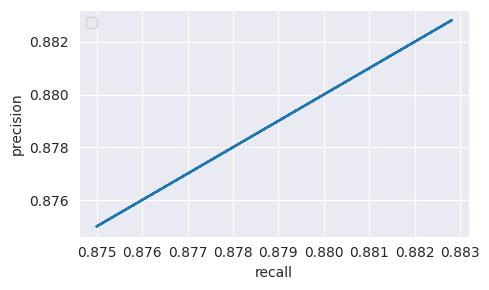

In [24]:
plt.figure(figsize=(5,3))
plt.plot(recall_scores,precision_scores,label='')
plt.xlabel('recall')
plt.ylabel('precision')
plt.tight_layout()
plt.legend()
plt.show()

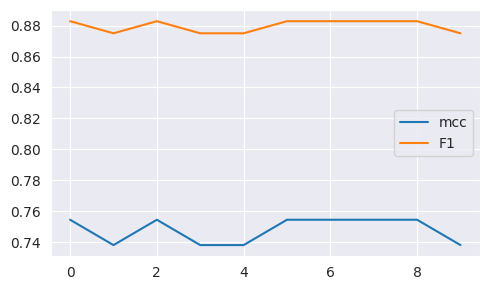

F1 0.8796875
mcc 0.7480635683760685


In [25]:
plt.figure(figsize=(5,3))
plt.plot(mcc,label='mcc')
plt.plot(f1,label='F1')

plt.tight_layout()
plt.legend()
plt.show()

print('F1', np.mean(f1))
print('mcc',np.mean(mcc))

#### 误差
+ 我们将学习器对样本的实际预测结果与样本的真实值之间的差异成为：误差（error）。
+ 在训练集上的误差称为训练误差（training error）或经验误差（empirical error）。
+ 在测试集上的误差称为测试误差（test error）。
+ 学习器在所有新样本上的误差称为泛化误差（generalization error）。
可以得知：在过拟合问题中，训练误差十分小，但测试误差教大；在欠拟合问题中，训练误差和测试误差都比较大。目前，欠拟合问题比较容易克服，例如增加迭代次数等，但过拟合问题还没有十分好的解决方案，过拟合是机器学习面临的关键障碍。

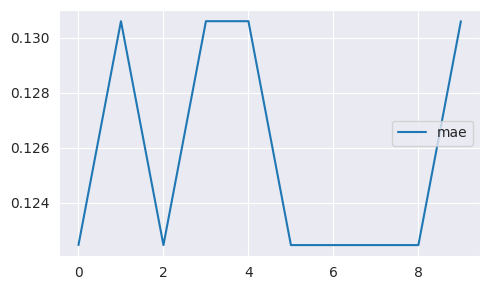

10 10 10
mae 0.12571428571428572


In [26]:
plt.figure(figsize=(5,3))
plt.plot(mean_absolute_errors,label='mae')
plt.tight_layout()
plt.legend()
plt.show()
print(len(precision_scores),len(mcc),len(f1))
print('mae', np.mean(mean_absolute_errors))

https://caterpillarstudygroup.github.io/LiuYuBo_ML_pages/

In [ ]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_test_predict))

    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(train_score), label="train")
    plt.plot([i for i in range(1, len(X_train)+1)], np.sqrt(test_score), label="test")
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
plot_learning_curve(algo=clf,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)